In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('TaxiFare.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.shape

(50000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

<Axes: xlabel='no_of_passenger', ylabel='count'>

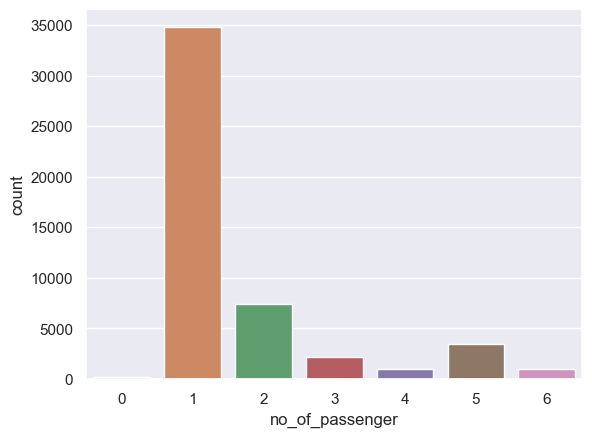

In [8]:
sns.countplot(x=df['no_of_passenger'])

In [9]:
df = df[df['no_of_passenger'] == 1]
df = df.drop(['unique_id', 'no_of_passenger'], axis=1)
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233


In [10]:
df.shape

(34808, 6)

In [11]:
corr_matrix = df.corr()
corr_matrix['amount'].sort_values(ascending=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5028\2984381640.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


amount                  1.000000
longitude_of_dropoff    0.005171
longitude_of_pickup     0.004961
latitude_of_dropoff    -0.005030
latitude_of_pickup     -0.005709
Name: amount, dtype: float64

In [13]:
import datetime
from math import sqrt

for i, row in df.iterrows():
    dt = datetime.datetime.strptime(row['date_time_of_pickup'], '%Y-%m-%d %H:%M:%S UTC')
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['longitude_of_dropoff'] - row['longitude_of_pickup']) * 54.6 # 1 degree == 54.6 miles
    y = (row['latitude_of_dropoff'] - row['latitude_of_pickup']) * 69.0   # 1 degree == 69 miles
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance
    
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,day_of_week,pickup_time,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,0.0,17.0,0.641024
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.0,5.275538
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,5.0,4.0,1.738444
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,7.0,1.253707
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,3.0,9.0,2.391384


In [14]:
df.drop(columns=['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff'], inplace=True)
df.head()

,amount,day_of_week,pickup_time,distance
0,4.5,0.0,17.0,0.641024
1,16.9,1.0,16.0,5.275538
3,7.7,5.0,4.0,1.738444
4,5.3,1.0,7.0,1.253707
5,12.1,3.0,9.0,2.391384


In [15]:
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount         1.000000
distance       0.014725
day_of_week    0.010151
pickup_time   -0.015876
Name: amount, dtype: float64

In [16]:
df.describe()

,amount,day_of_week,pickup_time,distance
count,34808.000000,34808.000000,34808.000000,34808.000000
mean,11.210226,2.947713,13.382757,11.850895
std,9.527580,1.942392,6.401627,246.753948
min,-5.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.771727
50%,8.500000,3.000000,14.000000,1.322725
75%,12.500000,5.000000,19.000000,2.414889
max,200.000000,6.000000,23.000000,24861.003946


In [17]:
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['amount'] > 0.0) & (df['amount'] < 50.0)]
df.shape

(21318, 4)

In [19]:
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount         1.000000
distance       0.848715
day_of_week    0.002447
pickup_time   -0.018968
Name: amount, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

x = df.drop(['amount'], axis=1)
y = df['amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
model.score(x_test, y_test)

0.7294968092631228

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7207057353445661

In [24]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, model.predict(x_test))

2.428339345293518

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(x_train, y_train)

cross_val_score(model, x, y, cv=5).mean()

0.6997168858484374

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)
model.fit(x_train, y_train)

cross_val_score(model, x, y, cv=5).mean()

0.7424626872254264

In [27]:
model.predict([[4, 17, 2.0]])

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([11.67386518])